#####予測モデルの訓練の流れ
1. データセットを訓練データとテストデータに分割
2. 説明変数の標準化
3. 予測モデルの指定
4. 損失関数の指定
5. 訓練データと損失関数を用いたモデルの訓練
6. テストデータを用いたモデルの評価
---
#####Flow of training a predictive model
1. split the dataset into training and test data
2. standardize explanatory variables
3. specify a predictive model
4. specify a loss function
5. train the model using the training data and the loss function
6. evaluate the model using the test data

目的
* 気温の変化がアイスの販売収入にどのように影響するかを分析
---
Objective
* Analyze how variations in temperature affect ice sales revenue.

データセット/Dataset
* Ice Cream.csv

* Temperature: 販売期間中に記録された気温
* Revenue: 各温度に対応するアイスの売上高
---
* Temperature: Temperature recorded during the sales period.
* Revenue: Ice sales revenue corresponding to each temperature.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data
ice_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/8data/Ice Cream.csv")
ice_df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [ ]:
# Shape of Data
ice_df.shape

(500, 2)

In [ ]:
# information about the data

ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [ ]:
# Summary of the data
ice_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.2816,8.097597,0.0,17.175,22.4,27.8,45.0
Revenue,500.0,522.0580,175.410399,10.0,406.000,530.0,643.0,1000.0


In [ ]:
#Check null values
ice_df.isna().sum()

,0
Temperature,0
Revenue,0


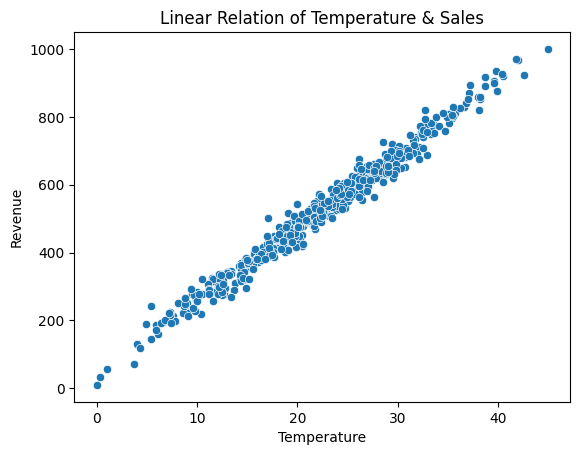

In [ ]:
# Visualize the data by exploring the data with seaborn library
sns.scatterplot(ice_df,x='Temperature',y='Revenue') #Scatter Plot : Temperature v/s Revenue
plt.title("Linear Relation of Temperature & Sales");

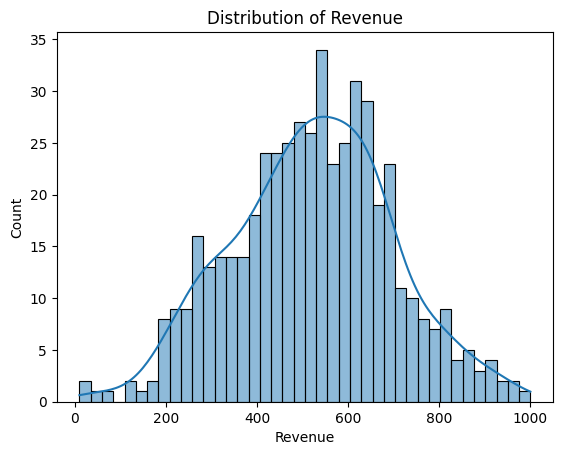

In [ ]:
# Distribution of Revenue
sns.histplot(ice_df['Revenue'],bins=40,kde=True) #Histogram : Distribution of Revenue
plt.title("Distribution of Revenue");

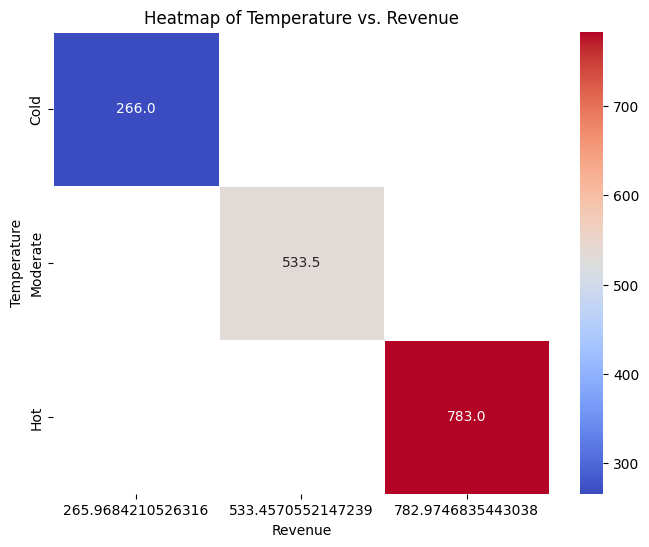

In [ ]:
import matplotlib.pyplot as plt
# Binning temperatures into categories
ice_df['temp_bins'] = pd.cut(ice_df['Temperature'], bins=3, labels=['Cold', 'Moderate', 'Hot'])
# Aggregating revenues within each temperature category
heatmap_data = ice_df.groupby('temp_bins')['Revenue'].mean().reset_index()

# Reshaping data for heatmap
heatmap = heatmap_data.pivot(index='temp_bins', columns='Revenue', values='Revenue')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5) #Heatmap : Temperature v/s Revenue
plt.title('Heatmap of Temperature vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Temperature')
plt.show();

In [ ]:
#Spilt the data
X = ice_df[['Temperature']]
y = ice_df['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529)

In [ ]:
#shape of spiltted data
print("The shape of X_train :",X_train.shape)
print("The shape ofX_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (375, 1)
The shape ofX_test : (125, 1)
The shape of y_train : (375,)
The shape of y_test : (125,)


In [ ]:
#Train the Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predictions on Test data
y_pred = lr.predict(X_test)

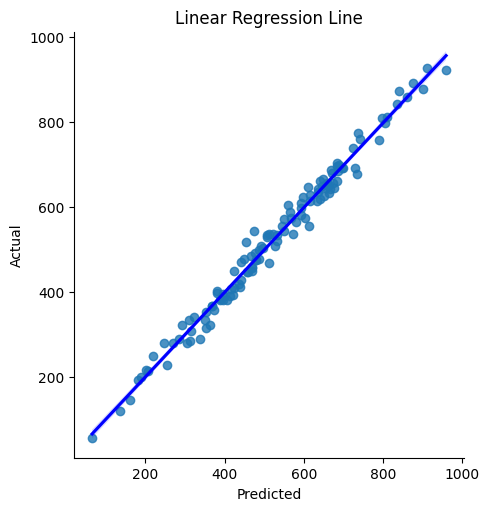

In [ ]:
# Create a DataFrame from the arrays
data = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Create a scatter plot with a linear regression line
sns.lmplot(x='Predicted', y='Actual', data=data, line_kws={'color': 'blue'}, palette='Set1')
plt.title("Linear Regression Line")
plt.show();


In [ ]:
#Evaluate the model: Accuracy
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_pred,y_test)
print("Accuracy of Linear Regression is : %.2f"%((1 - error)*100),'%')

Accuracy of Linear Regression is : 95.89 %


* モデルの性能： このモデルは、テストデータセットにおいて95%以上の高い精度を達成
* このモデルが、与えられた特徴を用いて目的変数を予測する際に、非常に優れた性能を発揮することを示している。
---
* Model performance: The model achieved an impressive accuracy of over 95% on the test dataset.
* This indicates that the model performs exceptionally well in predicting target variable using the given features.